In [1]:
import pandas as pd 
import numpy as np
import json
import os
from datetime import datetime


In [2]:
file_array = []
dates = []


for file in os.listdir("/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/"):
    if file.endswith("binance_orderbook.json"):
        file_array.append(os.path.join("/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/", file))


for file in file_array:
    date = file.split('/')[6].split('_')[0]
    dates.append(date)

In [3]:
slippage = []
slippage_pairs = []
currencies = []

for index, file in enumerate(file_array):
    print(file)
    try:
        with open(file, encoding='utf-8') as data_file:
            dataset = json.loads(data_file.read())
        for pair in dataset: 
            if (len(dataset[pair]['asks']) > 5 and len(dataset[pair]['bids']) > 5):
                currency = {}
                currency['Pair'] = pair
                currency['Asks'] = dataset[pair]['asks']
                currency['Bids'] = dataset[pair]['bids']
                currency['Date'] = dates[index]
                currencies.append(currency)
    except:
        continue


        
df = pd.DataFrame(currencies)

pair_dict = {}


for pair, value in dict(df['Pair'].value_counts()).items():
    trading_currency = pair.split('/')[1]
    if trading_currency in pair_dict.keys():
        pair_dict[trading_currency] += value 
    else:
        pair_dict[trading_currency] = value

pair_dict

sorted(pair_dict.items(), key=lambda x: x[0])


#assume PAX TUSD USDC USDS USDT are 1 to 1 

#Find How much BNB BTC ETH XRP you can get for 10k USD

bitcoin_prices_in_usd = {}
eth_prices_in_usd = {}
bnb_prices_in_usd = {}
xrp_prices_in_usd = {}


for entry in currencies:
    if entry['Pair'] == 'BTC/USDT':
        bitcoin_prices_in_usd[(entry['Date'])] = (entry['Asks'][0][0] + entry['Bids'][0][0]) / 2
    if entry['Pair'] == 'ETH/USDT':
        eth_prices_in_usd[(entry['Date'])] = (entry['Asks'][0][0] + entry['Bids'][0][0]) / 2
    if entry['Pair'] == 'BNB/USDT':
        bnb_prices_in_usd[(entry['Date'])] = (entry['Asks'][0][0] + entry['Bids'][0][0]) / 2
    if entry['Pair'] == 'XRP/USDT':
        xrp_prices_in_usd[(entry['Date'])] = (entry['Asks'][0][0] + entry['Bids'][0][0]) / 2

def calc_slippage_asks(asks, amount):
    starting_amount = amount
    asking_price = asks[0][0]
    index = 0
    while starting_amount > 0:
        try:
            amount = asks[index][0] * asks[index][1]
            if starting_amount - amount < 0:
                break
            else:
                index +=1
        except:
            return 100

    return (asks[index][0] - asking_price) / asking_price


def calc_slippage_bids(bids, amount):
    starting_amount = amount
    bid_price = bids[0][0]
    index = 0
    while starting_amount > 0:
        try:
            amount = bids[index][0] * bids[index][1]
            if starting_amount - amount < 0:
                break
            else:
                index +=1
        except:
            return 100
    return (bids[index][0] - bid_price) / bid_price * 100


def calc_total_order_book_depth(date, bids_or_asks, pair):
    base_currency = pair.split('/')[1]
    total_depth = 0
    for bid_or_ask in bids_or_asks:
        if base_currency == 'BTC':
            total_depth += (bid_or_ask[0] * bitcoin_prices_in_usd[date] * bid_or_ask[1])
        elif base_currency == 'XRP':
            total_depth += (bid_or_ask[0] * xrp_prices_in_usd[date] * bid_or_ask[1])
        elif base_currency == 'BNB':
            total_depth += (bid_or_ask[0] * bnb_prices_in_usd[date] * bid_or_ask[1])
        elif base_currency == 'ETH':
            total_depth += (bid_or_ask[0] * eth_prices_in_usd[date] * bid_or_ask[1])
        else:
            total_depth += (bid_or_ask[0] * bid_or_ask[1])
    return total_depth

def calc_bid_ask_spread(bids, asks):
    spread = asks[0][0] - bids[0][0]
    percentage_spread = (spread / asks[0][0]) * 100
    return percentage_spread
    


/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1551627357881_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1551695146658_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552065980946_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552107331032_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1551691387119_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1551433626740_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552174953488_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552156177826_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1551478301522_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552111083524_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-ex

/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1551576224383_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1551634905971_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1551857123762_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1551498069197_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1551823307006_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1551365730909_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1551532996963_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1551564477708_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1551751740385_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1551540907547_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-ex

/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1551596146620_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1551808160391_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1551341758364_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552073504133_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552092304327_binance_orderbook.json


In [4]:
final_currencies = []

for index, currency in enumerate(currencies):
    currency_dict = {}
    bid_ask_spread = calc_bid_ask_spread(currency['Bids'], currency['Asks'])
    currency_dict['bid_ask_spread'] = bid_ask_spread
    currency_dict['date'] = currency['Date']
    currency_dict['pair'] = currency['Pair']
    currency_dict['ask_depth'] = calc_total_order_book_depth(currency['Date'], currency['Asks'],currency['Pair'])
    currency_dict['bid_depth'] = calc_total_order_book_depth(currency['Date'], currency['Bids'], currency['Pair'])
    final_currencies.append(currency_dict)



        
def convert_cmc_to_binance(row):
    if row.split('/')[0] == 'BCHABC':
        return 'BCH' + '/' + row.split('/')[1]
    elif row.split('/')[0] == 'BCHSV':
        return 'BSV' + '/' + row.split('/')[1]
    elif row.split('/')[0] == 'YOYO':
        return 'YOYOW' + '/' + row.split('/')[1]
    else:
        return row

volume_dict = {}

df_rank = pd.read_csv('/users/anthony/desktop/slipping-and-sliding/all-exchanges/volume_rank.csv')

spread_df = pd.DataFrame(final_currencies)



/Users/anthony/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


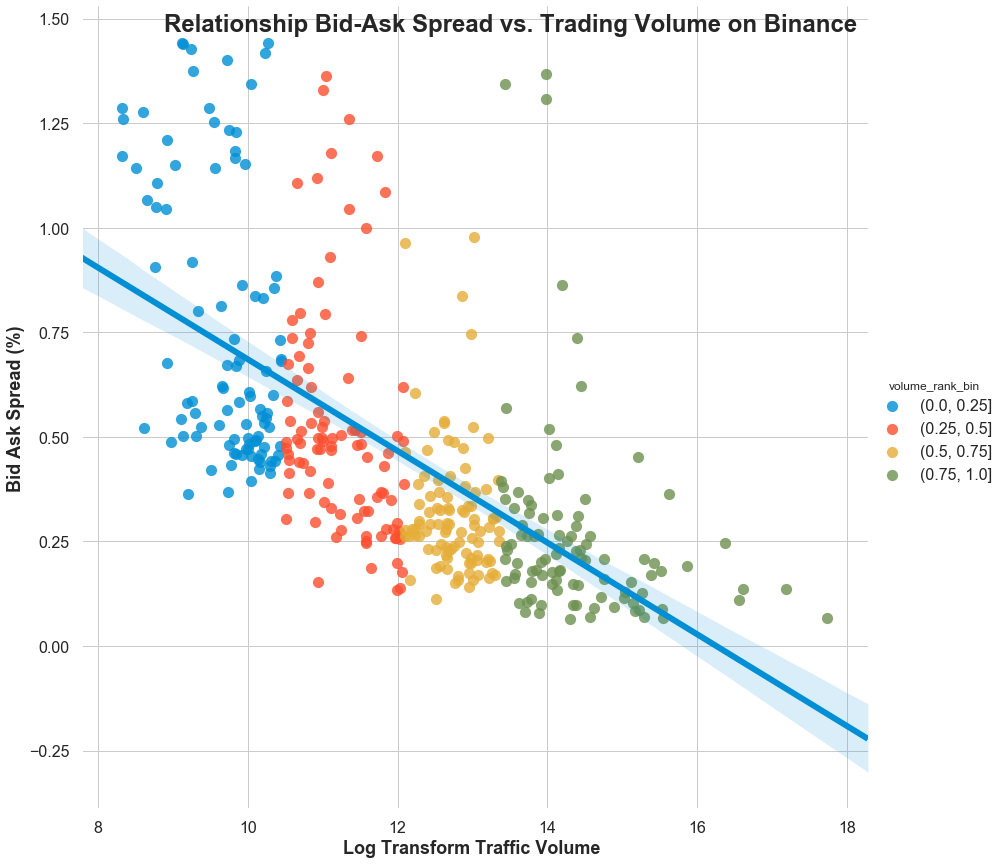

In [24]:

def gen_bins(max_value, increment):
    bins = [0]
    x = 0
    while x < max_value:
        x += increment
        bins.append(x)
    return bins
final_df = pd.merge(spread_df, df_rank, left_on='pair', right_on='pair', how='left')

final_df['total_order_depth'] = final_df['ask_depth'] + final_df['bid_depth']

median_df_rank = pd.DataFrame(final_df.groupby('pair').median()['total_order_depth'].rank(ascending=False).sort_values()).reset_index()

median_df_rank.columns = ['pair','median rank']

last_df = pd.merge(final_df, median_df_rank, left_on='pair', right_on='pair')


%matplotlib inline

import seaborn as sns
import matplotlib as plt

last_df = final_df.groupby('pair').mean()[['bid_ask_spread', 'average_volume']]




no_outliers_df = last_df[(last_df['bid_ask_spread'] < last_df['bid_ask_spread'].quantile(.95)) & (last_df['bid_ask_spread'] > last_df['bid_ask_spread'].quantile(.05))].reset_index()


no_outliers_df['log_volume'] = np.log(no_outliers_df['average_volume'])

no_outliers_df['volume_rank'] = no_outliers_df['average_volume'].rank(ascending=True, pct=True)

no_outliers_df = no_outliers_df.sort_values('volume_rank', ascending=True)

no_outliers_df['volume_rank_bin'] = pd.cut(no_outliers_df['volume_rank'], gen_bins(no_outliers_df['volume_rank'].max(), 0.25))

no_outliers_df



g = sns.lmplot(data=no_outliers_df, x='log_volume', y='bid_ask_spread', hue='volume_rank_bin', fit_reg=False, size=12)
y = sns.regplot(x="log_volume", y="bid_ask_spread", data=no_outliers_df, scatter=False, ax=g.axes[0, 0])


fig = g.fig 

# Add a title to the Figure
g.set_xlabels('Log Transform Traffic Volume ', fontsize=18, weight='bold')
g.set_ylabels('Bid Ask Spread (%)', fontsize=18, weight='bold')

fig.suptitle("Relationship Bid-Ask Spread vs. Trading Volume on Binance", fontsize=24, weight='bold')
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.style.use('seaborn-poster')
plt.style.use('fivethirtyeight')
plt.rcParams['axes.edgecolor'] = '#ffffff'
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.rcParams['figure.facecolor'] = '#ffffff'
plt.rcParams['patch.edgecolor'] = '#ffffff'
plt.rcParams['patch.facecolor'] = '#ffffff'
plt.rcParams['savefig.edgecolor'] = '#ffffff'
plt.rcParams['savefig.facecolor'] = '#ffffff'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16


Text(0.5,1,'Distribution of Bid-Ask Spreads 2 Trading Pairs on Binance')

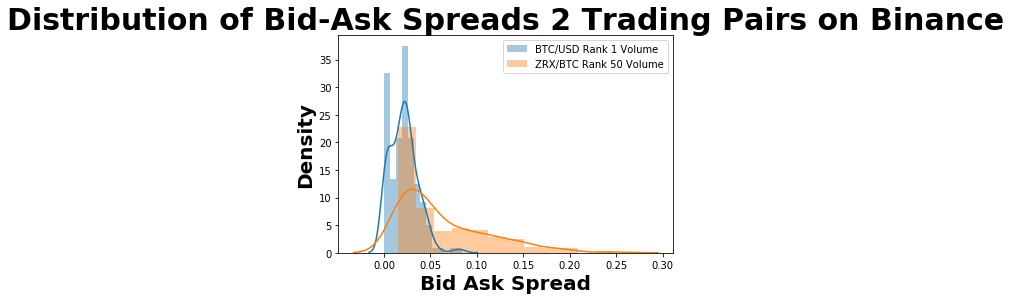

In [6]:
rank_1 = final_df[final_df['volume_rank']==1]
rank_50 = final_df[final_df['volume_rank']==50]

ax1 = sns.distplot(rank_1['bid_ask_spread'])
ax2 = sns.distplot(rank_50['bid_ask_spread'])



ax1.legend(['BTC/USD Rank 1 Volume','ZRX/BTC Rank 50 Volume'])
ax1.set_xlabel('Bid Ask Spread', fontsize=20, weight='bold')
ax1.set_ylabel('Density', fontsize=20, weight='bold')
ax1.set_title('Distribution of Bid-Ask Spreads 2 Trading Pairs on Binance', fontsize=30, weight='bold')

In [7]:
rank_50

,ask_depth,bid_ask_spread,bid_depth,date,pair,Unnamed: 0,average_volume,volume_rank,total_order_depth
25,31980.524075,0.047476,40033.158708,1551627357881,ZRX/BTC,52,2.010651e+06,50.0,72013.682784
458,23421.385857,0.033344,33870.930512,1551695146658,ZRX/BTC,52,2.010651e+06,50.0,57292.316368
891,68626.739992,0.064516,37409.946257,1552065980946,ZRX/BTC,52,2.010651e+06,50.0,106036.686249
1330,47621.655297,0.079911,46187.075328,1552107331032,ZRX/BTC,52,2.010651e+06,50.0,93808.730624
1769,27568.118449,0.049759,81826.750542,1551691387119,ZRX/BTC,52,2.010651e+06,50.0,109394.868991
2202,26452.257549,0.015557,62175.263267,1551433626740,ZRX/BTC,52,2.010651e+06,50.0,88627.520816
2635,41409.877427,0.126422,44244.384668,1552174953488,ZRX/BTC,52,2.010651e+06,50.0,85654.262096
3074,47280.669295,0.094295,53456.091918,1552156177826,ZRX/BTC,52,2.010651e+06,50.0,100736.761212
3513,24844.900870,0.015518,62438.121908,1551478301522,ZRX/BTC,52,2.010651e+06,50.0,87283.022778
3946,42042.572726,0.015805,44497.414301,1552111083524,ZRX/BTC,52,2.010651e+06,50.0,86539.987027


In [8]:
final_df.groupby('pair').describe()['bid_ask_spread'].to_csv('/users/anthony/desktop/bid_ask_spread_every_pair.csv')


In [9]:
rank_1.append(rank_50).groupby('pair').describe()['bid_ask_spread']

,count,mean,std,min,25%,50%,75%,max
pair,,,,,,,,
BTC/USDT,186.0,0.021236,0.014791,0.000255,0.009170,0.021249,0.028866,0.084117
ZRX/BTC,186.0,0.062249,0.047624,0.015218,0.030961,0.047382,0.088829,0.247028
